In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Impossible Years,1968
1,Bad Girl (II),2016
2,Still,2017
3,Sapho,1934
4,As I Die Slowly,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 15
The Outsider            12
Maya                    12
Freedom                 11
Temptation              11
Othello                 11
The Three Musketeers    11
She                     10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [13]:
t = titles[titles.year // 10 == 193]
t = t.year.value_counts().head(3)
t

1937    1200
1936    1142
1938    1138
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

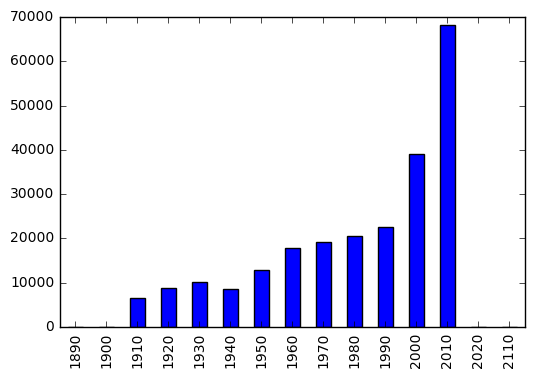

In [26]:
t = titles.year // 10
t = t* 10
t.value_counts().sort_index().plot(kind='bar')

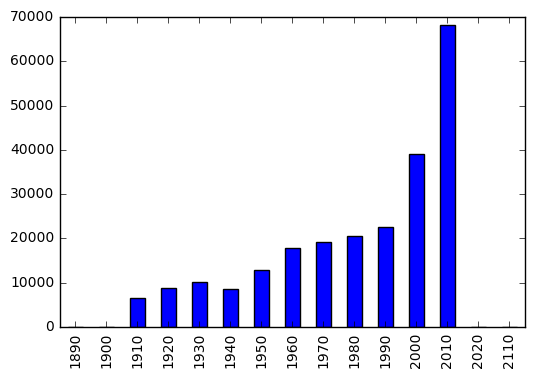

In [27]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

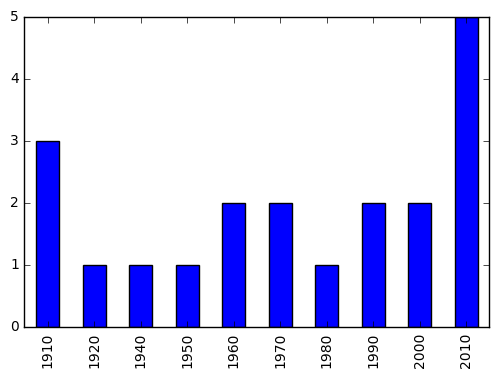

In [30]:
t= titles[titles.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind = 'bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

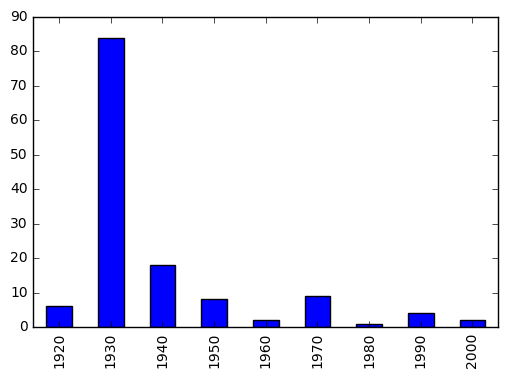

In [31]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

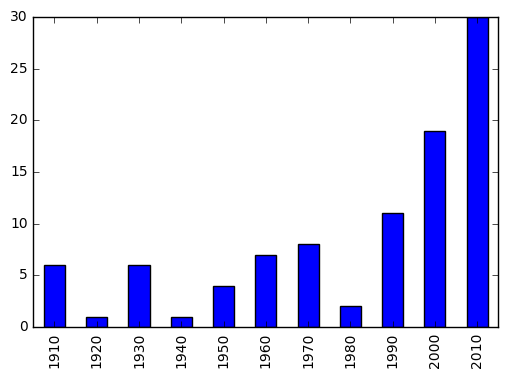

In [32]:
c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [35]:
c = cast.character.value_counts()
c.head(11)

Himself        20643
Dancer         12211
Extra          11620
Reporter        8305
Doctor          7563
Student         7459
Party Guest     6993
Policeman       6976
Nurse           6798
Bartender       6724
Herself         6500
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [36]:
c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II    11
Mary Jo Pehl           9
Margaret Thatcher      9
Joyce Brothers         9
Laura (II) M?gica      9
Marta Berrocal         8
Marina Revilla         8
In?s J. Southern       8
Estrella Borja         8
Elena Santisteban      7
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [37]:
c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler          100
Richard Nixon          46
Ronald Reagan          40
John F. Kennedy        36
George W. Bush         24
Ron Jeremy             23
Winston Churchill      23
Bill Clinton           22
Martin Luther King     22
Benito Mussolini       22
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [45]:
c = cast[cast.year == 1945]
c.name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     32
Bess Flowers        29
Harold Miller       29
Nolan Leary         27
Frank O'Connor      27
Franklyn Farnum     26
Larry Steers        25
Charles Sullivan    24
Herman Hack         24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [46]:
c = cast[cast.year == 1985]
c.name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Raj Babbar       15
Aruna Irani      15
Lou Scheimer     15
Mohanlal         15
Om Shivpuri      13
Deven Verma      13
Rajesh Khanna    13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

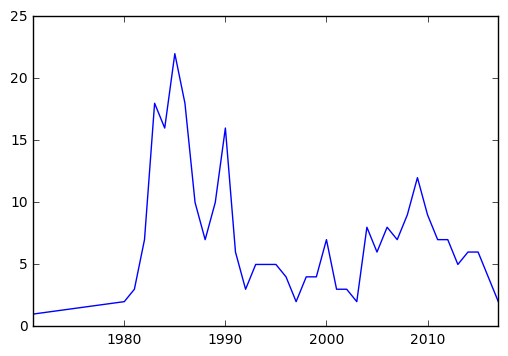

In [51]:
c = cast[cast.name == 'Mammootty']
c.year.value_counts().sort_index().plot()


### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [52]:
c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [53]:
c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Promo Cadet      5
Science Fair Judge       5
Science Reporter         5
Science Kid              5
Science Club Member      5
Science                  4
Science Fair Kid         4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

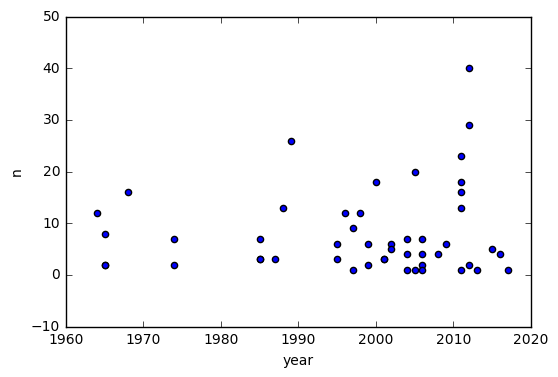

In [56]:
c = cast
c = c[c.name == 'Judi Dench']
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

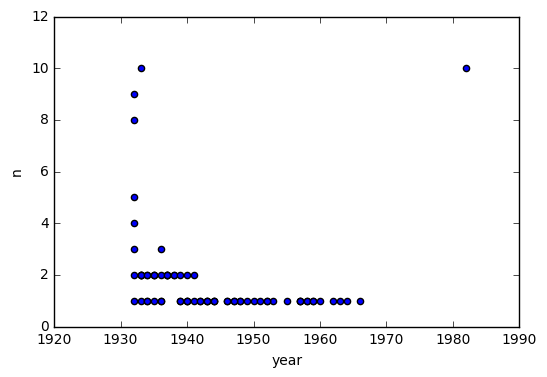

In [57]:
c = cast
c = c[c.name == 'Cary Grant']
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

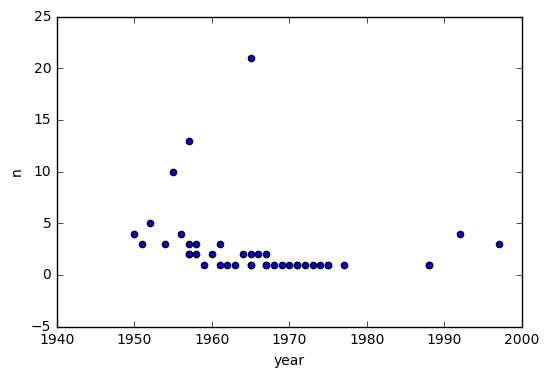

In [58]:
c = cast
c = c[c.name == 'Sidney Poitier']
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [59]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6684
actress    3004
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [60]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actor      4617
actress    4601
Name: type, dtype: int64